# larcv2 Data Interface

In [1]:
import ROOT
from larcv import larcv
larcv.load_pyutil()


Welcome to JupyROOT 6.08/06


<ROOT.larcv::load_pyutil object at 0x47c9810>

In [2]:
_file = "/home/cadams/larcv-tutorial/example_larcv.root"

Let's start by opening the bare root file:

In [3]:
_f = ROOT.TFile(_file)
_f.ls()

TFile**		/home/cadams/larcv-tutorial/example_larcv.root	
 TFile*		/home/cadams/larcv-tutorial/example_larcv.root	
  KEY: TTree	image2d_wire_tree;1	wire tree
  KEY: TTree	chstatus_wire_tree;1	wire tree
  KEY: TTree	particle_mcst_tree;1	mcst tree
  KEY: TTree	cluster2d_keypt_tree;1	keypt tree
  KEY: TTree	cluster2d_mcst_tree;1	mcst tree
  KEY: TTree	cluster3d_mcst_tree;1	mcst tree


Let's check out image2d, since that's the basic data representation:

In [4]:
chain = ROOT.TChain("image2d_wire_tree")
chain.AddFile(_file)

1

In [5]:
nbytes = chain.GetEntry(0)
image2d = chain.image2d_wire_branch

This gives access to the 'EventImage2D' object, which is the collection of all image 2d for a particular run/subrun/event combo.  That's 3 images in this case.  We can get the array and draw the images with matplotlib:

In [6]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline


_image_array has type <type 'numpy.ndarray'>
Image dimensions are (512, 512)
_image_array has type <type 'numpy.ndarray'>
Image dimensions are (512, 512)
_image_array has type <type 'numpy.ndarray'>
Image dimensions are (512, 512)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  after removing the cwd from sys.path.


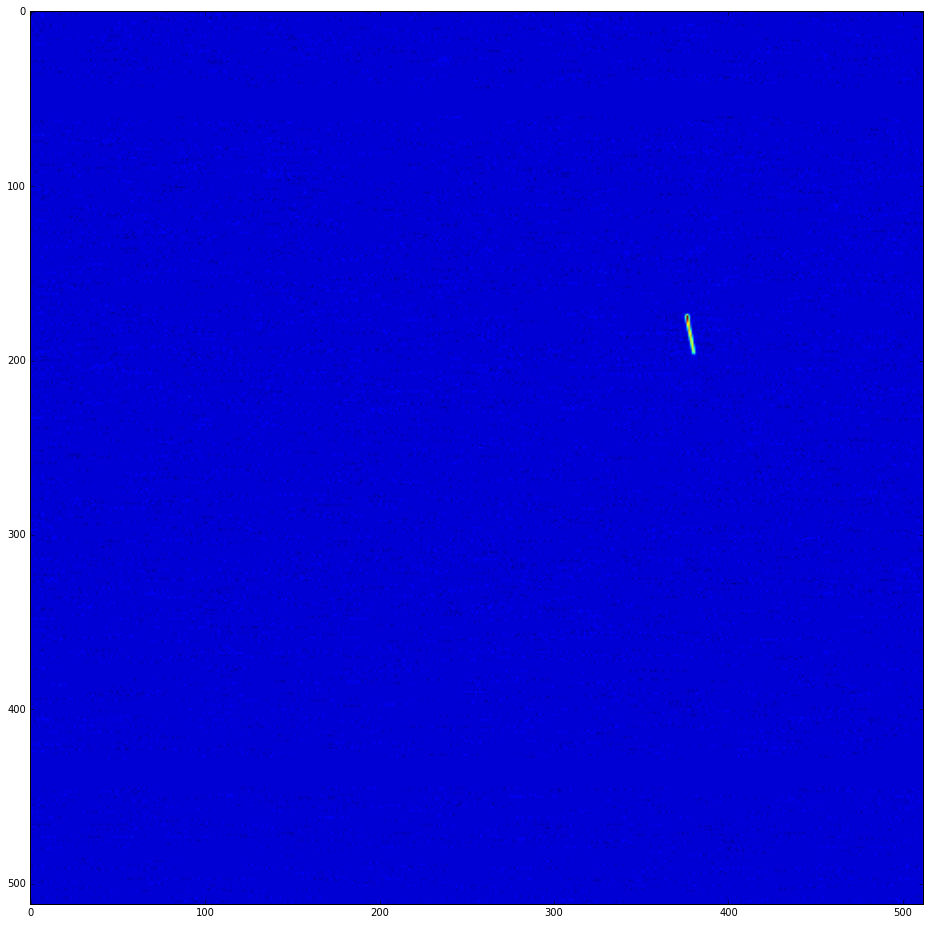

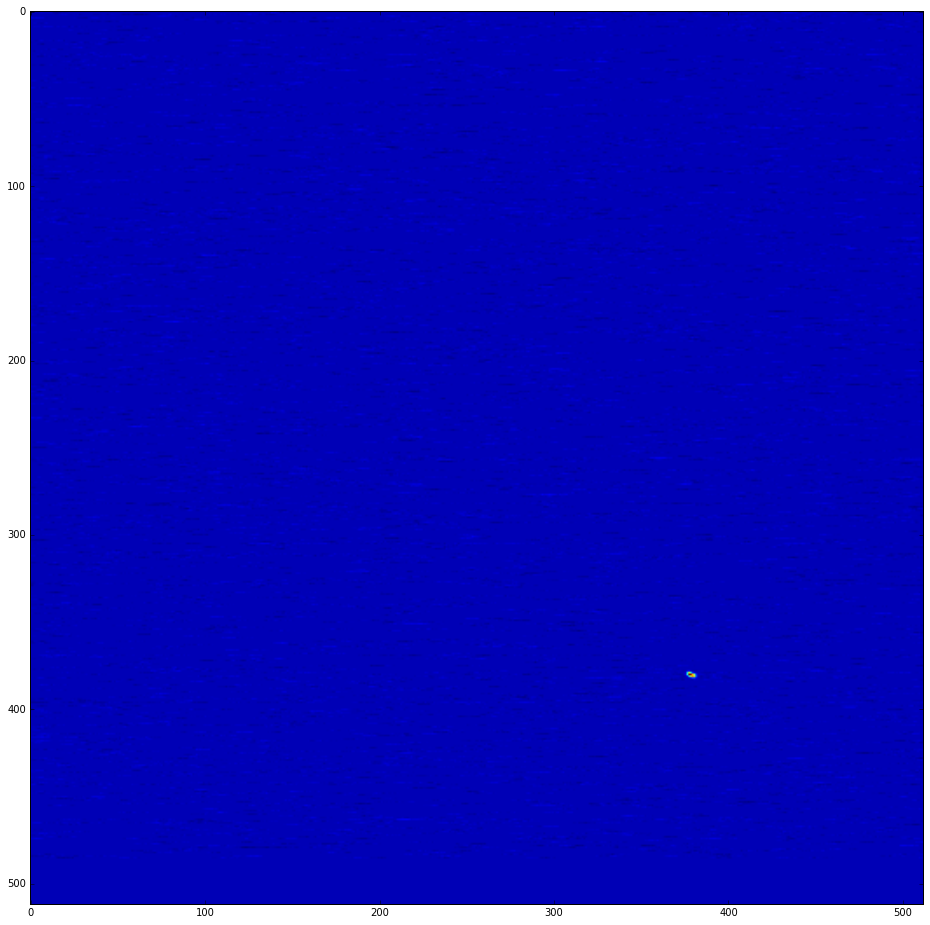

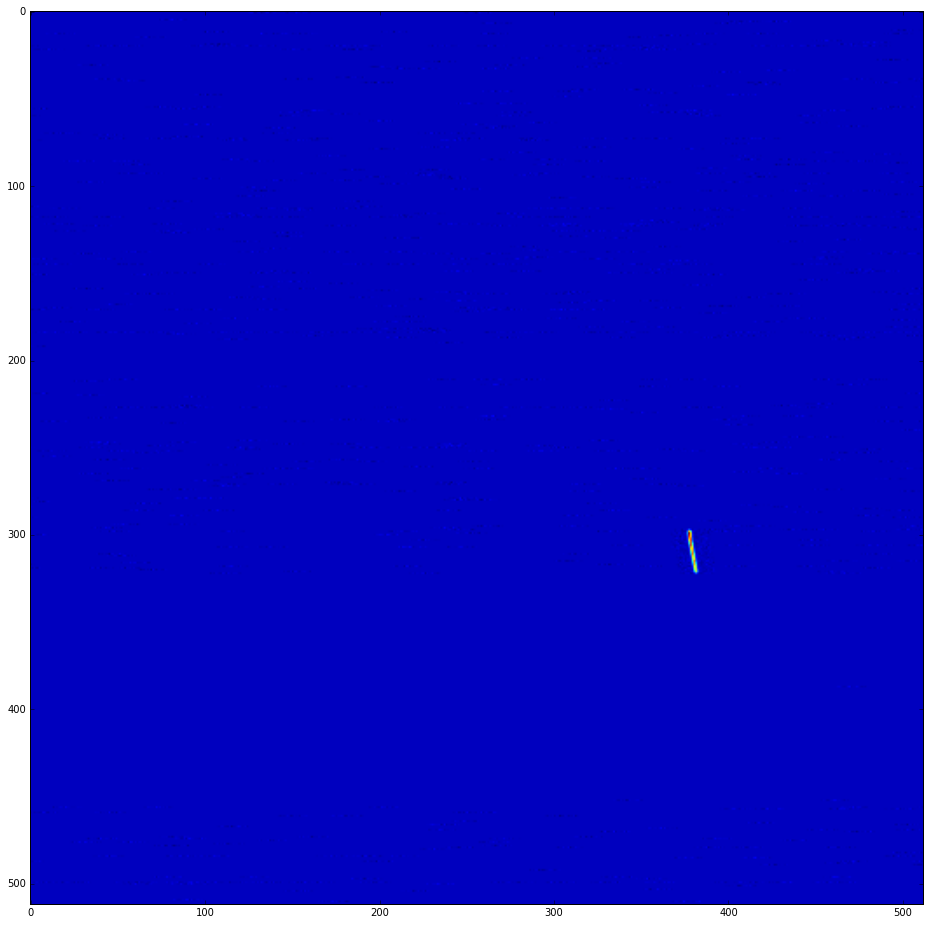

In [7]:
for image in image2d.image2d_array():
    # Note here that std::vectors in pyroot are iterable
    # larcv has a helper function to convert std::vector to numpy array, so we can use that:
    _image_array = larcv.as_ndarray(image)
    print "_image_array has type {}".format(type(_image_array))
    print "Image dimensions are {}".format(_image_array.shape)
    #Show the image with imshow:
    fig = plt.figure(figsize=(16,16))
    plt.imshow(_image_array)

Looks like it's working.  We can (just for fun, here) zoom in on the region with the highest charge (take just one plane for this):

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.
  """Entry point for launching an IPython kernel.


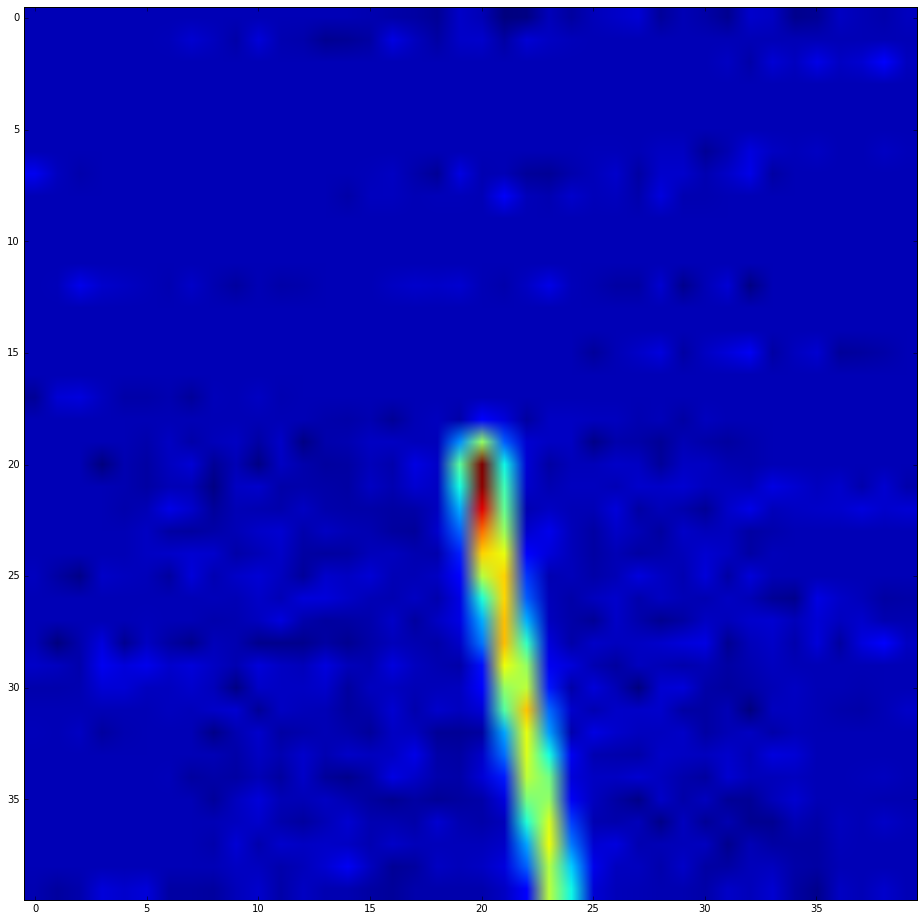

In [14]:
_collection_plane = larcv.as_ndarray(image2d.image2d_array()[0])
_x, _y = numpy.unravel_index(_collection_plane.argmax(), _collection_plane.shape)
_zoom_image = _collection_plane[_x-20:_x+20, _y-20:_y+20]
fig = plt.figure(figsize=(16,16))
plt.imshow(_zoom_image)